In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
df=pd.read_csv('titanic.csv')

In [5]:
df

Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      male  22.0                        1                        0   7.2500  
1    female  38.0                        1                        0  71.2833  
2    female  26.0                        0                        0   7.9250  
3    female  35.0                        1                        0  53.1000  
4      male  35.0                        0                        0   8.0500  
..      ...   ...                      ...                      ...      ...  
882    male  27.0                        0                        0  13.0000  
883  female  19.0                        0                        0  30.0000  
884  female   7.0                        1                        2  23.4500  
885    male  26.0                        0                        0  30.0000  
886    male  32.0                        0                        0   7.7500  

[887 rows x 8 columns]

In [7]:
df.shape

(887, 8)

In [8]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
print(df.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [10]:
df.describe(include='all')


Survived      Pclass                    Name   Sex         Age  \
count   887.000000  887.000000                     887   887  887.000000   
unique         NaN         NaN                     887     2         NaN   
top            NaN         NaN  Mr. Owen Harris Braund  male         NaN   
freq           NaN         NaN                       1   573         NaN   
mean      0.385569    2.305524                     NaN   NaN   29.471443   
std       0.487004    0.836662                     NaN   NaN   14.121908   
min       0.000000    1.000000                     NaN   NaN    0.420000   
25%       0.000000    2.000000                     NaN   NaN   20.250000   
50%       0.000000    3.000000                     NaN   NaN   28.000000   
75%       1.000000    3.000000                     NaN   NaN   38.000000   
max       1.000000    3.000000                     NaN   NaN   80.000000   

        Siblings/Spouses Aboard  Parents/Children Aboard       Fare  
count                887.000000               887.000000  887.00000  
unique                      NaN                      NaN        NaN  
top                         NaN                      NaN        NaN  
freq                        NaN                      NaN        NaN  
mean                   0.525366                 0.383315   32.30542  
std                    1.104669                 0.807466   49.78204  
min                    0.000000                 0.000000    0.00000  
25%                    0.000000                 0.000000    7.92500  
50%                    0.000000                 0.000000   14.45420  
75%                    1.000000                 0.000000   31.13750  
max                    8.000000                 6.000000  512.32920

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\Prave\AppData\Local\Temp\ipykernel_40532\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [12]:
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

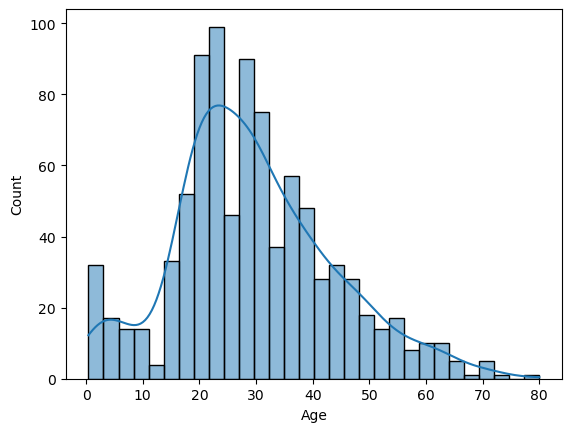

In [14]:
sns.histplot(df['Age'], bins=30, kde=True)


<Axes: xlabel='Pclass', ylabel='Fare'>

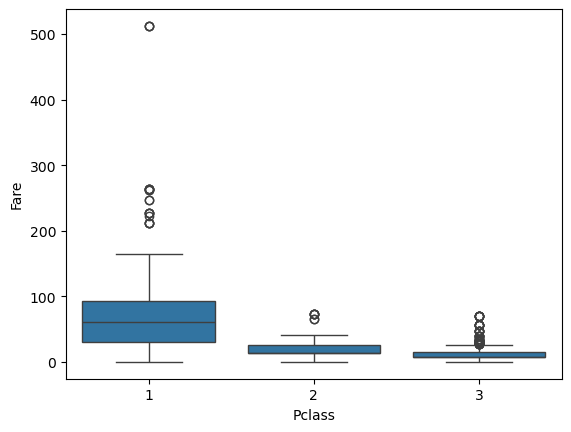

In [15]:
sns.boxplot(x='Pclass', y='Fare', data=df)


In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)


<Axes: xlabel='Sex', ylabel='count'>

<Axes: >

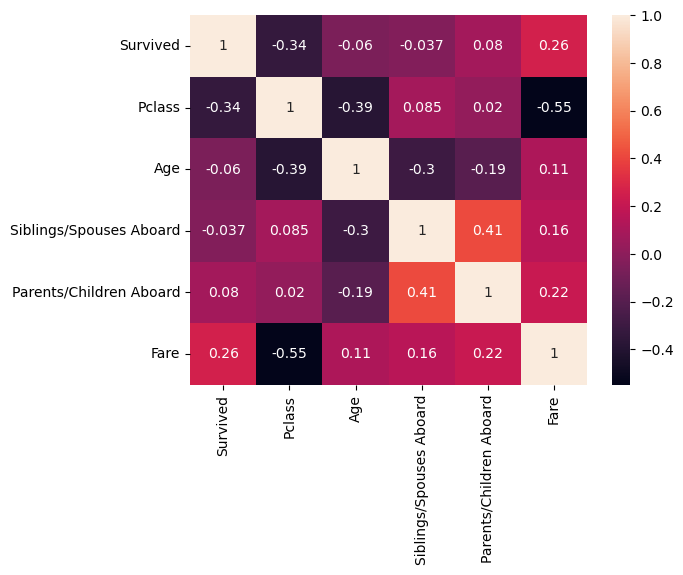

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [18]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100


Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.564682  24.435318

<Axes: xlabel='Fare'>

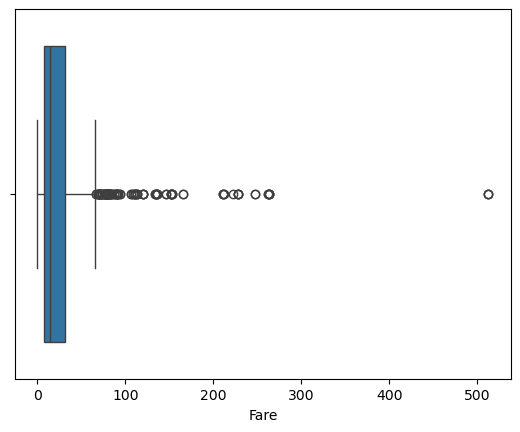

In [19]:
sns.boxplot(x=df['Fare'])


In [20]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]


In [21]:
outliers

Survived  Pclass                                               Name  \
27          0       1                      Mr. Charles Alexander Fortune   
87          1       1                          Miss. Mabel Helen Fortune   
117         0       1                            Mr. Quigg Edmond Baxter   
257         1       1                                    Miss. Anna Ward   
297         1       1     Mrs. James (Helene DeLaudeniere Chaput) Baxter   
309         1       1                          Miss. Emily Borie Ryerson   
339         1       1                      Miss. Alice Elizabeth Fortune   
375         0       1                           Mr. Harry Elkins Widener   
378         1       1                               Miss. Rosalie Bidois   
435         0       1                                   Mr. Mark Fortune   
524         0       1                                  Mr. John Farthing   
554         0       1                                 Mr. Victor Robbins   
676         1       1                  Mr. Thomas Drake Martinez Cardeza   
686         1       1                   Miss. Georgette Alexandra Madill   
697         1       1   Mrs. John Jacob (Madeleine Talmadge Force) Astor   
713         1       1                       Miss. Caroline Louise Endres   
726         1       1                       Miss. Elisabeth Walton Allen   
733         1       1                              Mr. Gustave J Lesurer   
738         1       1                         Miss. Susan Parker Ryerson   
775         1       1  Mrs. Edward Scott (Elisabeth Walton McMillan) ...   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard      Fare  
27     male  19.0                        3                        2  263.0000  
87   female  23.0                        3                        2  263.0000  
117    male  24.0                        0                        1  247.5208  
257  female  35.0                        0                        0  512.3292  
297  female  50.0                        0                        1  247.5208  
309  female  18.0                        2                        2  262.3750  
339  female  24.0                        3                        2  263.0000  
375    male  27.0                        0                        2  211.5000  
378  female  42.0                        0                        0  227.5250  
435    male  64.0                        1                        4  263.0000  
524    male  49.0                        0                        0  221.7792  
554    male  45.0                        0                        0  227.5250  
676    male  36.0                        0                        1  512.3292  
686  female  15.0                        0                        1  211.3375  
697  female  18.0                        1                        0  227.5250  
713  female  38.0                        0                        0  227.5250  
726  female  29.0                        0                        0  211.3375  
733    male  35.0                        0                        0  512.3292  
738  female  21.0                        2                        2  262.3750  
775  female  43.0                        0                        1  211.3375

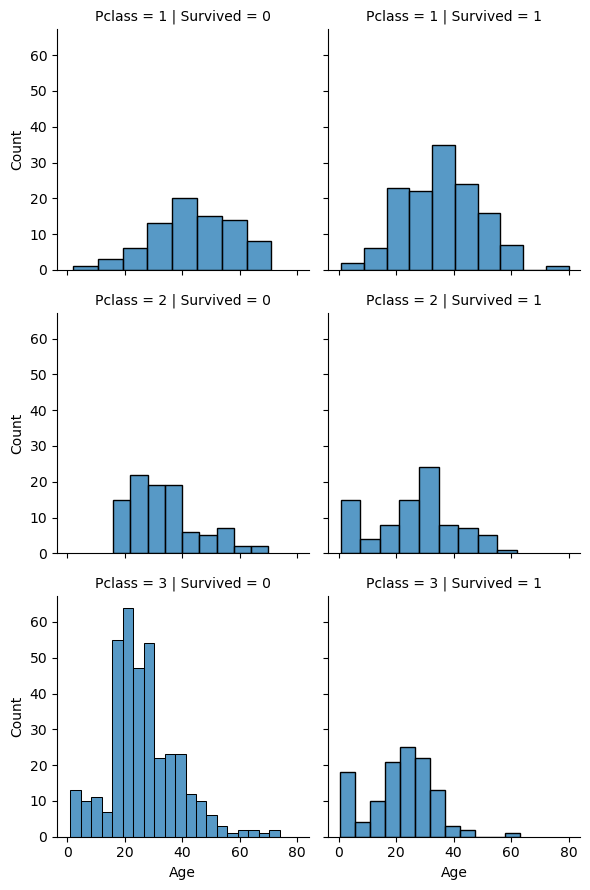

In [22]:
sns.FacetGrid(df, col='Survived', row='Pclass').map(sns.histplot, 'Age')


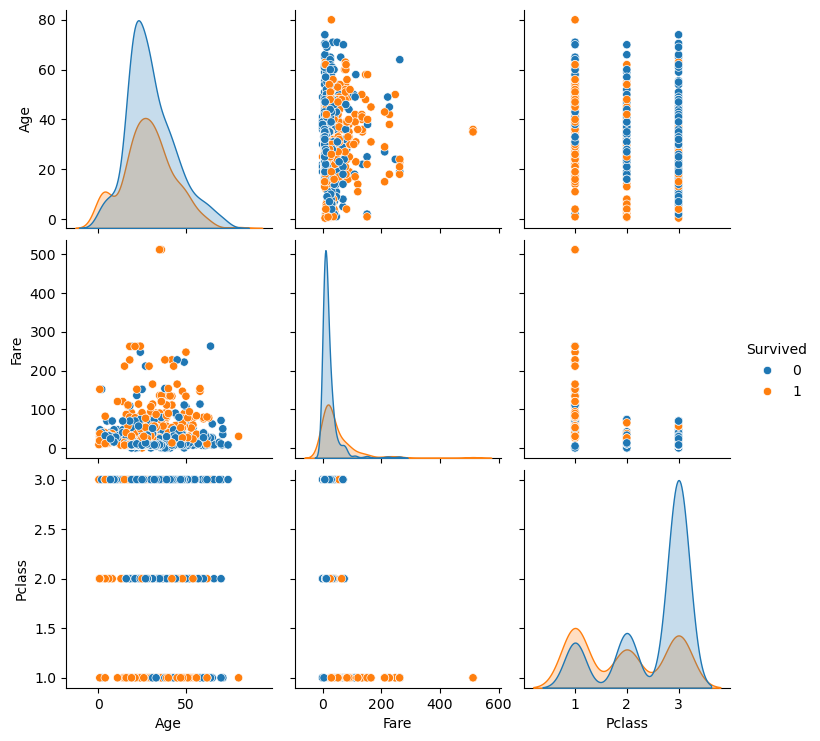

In [24]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
